### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and describing data

In [2]:
ad_features_df = pd.read_csv('ad_feature.csv')

In [3]:
ad_features_df.describe()

,adgroup_id,cate_id,campaign_id,customer,brand,price
count,846811.000000,846811.000000,846811.000000,846811.000000,600481.000000,8.468110e+05
mean,423406.000000,5868.593464,206552.604280,113180.406006,229254.422596,1.838867e+03
std,244453.423738,2705.171203,125192.340908,73435.834950,132288.849633,3.108877e+05
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000e-02
25%,211703.500000,4383.000000,97583.000000,47960.000000,110616.000000,4.900000e+01
50%,423406.000000,6183.000000,200780.000000,107278.000000,234423.000000,1.390000e+02
75%,635108.500000,7047.000000,314565.500000,172013.500000,344818.000000,3.520000e+02
max,846811.000000,12960.000000,423436.000000,255875.000000,461497.000000,1.000000e+08


In [4]:
ad_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846811 entries, 0 to 846810
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   adgroup_id   846811 non-null  int64  
 1   cate_id      846811 non-null  int64  
 2   campaign_id  846811 non-null  int64  
 3   customer     846811 non-null  int64  
 4   brand        600481 non-null  float64
 5   price        846811 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 38.8 MB


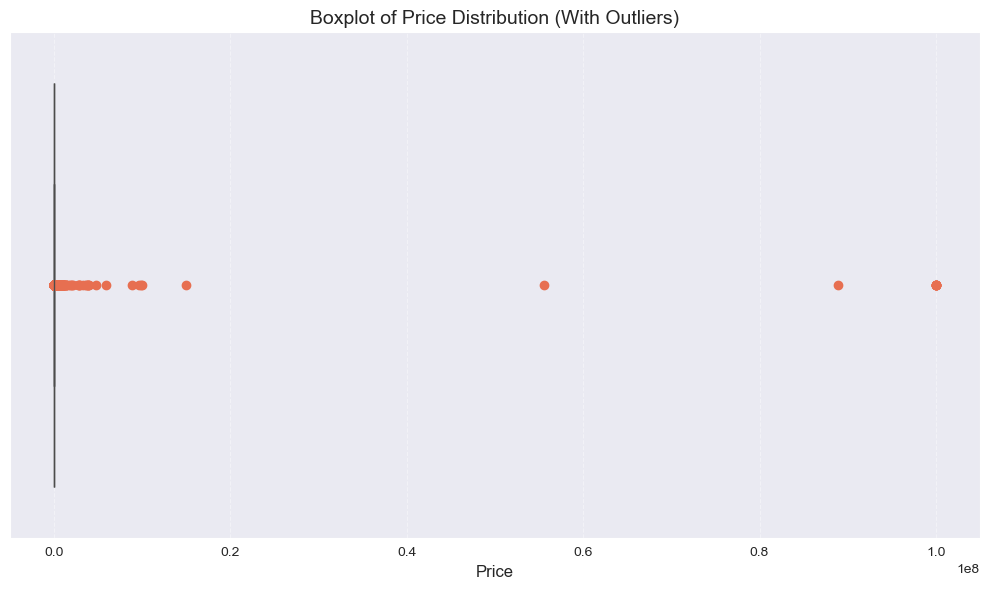

In [5]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.boxplot(
    x=ad_features_df['price'],
    color="#4C72B0",
    fliersize=4,
    flierprops=dict(
        marker='o',
        markerfacecolor='#E76F51',
        markeredgecolor='#E76F51',
        markersize=6,
        linestyle='none'
    )
)

plt.title('Boxplot of Price Distribution (With Outliers)', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.savefig("graphs/price_boxplot.png", dpi=300, bbox_inches='tight')

plt.show()

In [6]:
Q1 = ad_features_df['price'].quantile(0.10)
Q3 = ad_features_df['price'].quantile(0.90)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

ad_features_cleaned_df = ad_features_df[(ad_features_df['price'] >= lower_bound) & (ad_features_df['price'] <= upper_bound)]
ad_features_cleaned_df = ad_features_cleaned_df.reset_index(drop=True)

print(f"Original DataFrame shape: {ad_features_df.shape}")
print(f"DataFrame shape after removing outliers: {ad_features_cleaned_df.shape}")

Original DataFrame shape: (846811, 6)
DataFrame shape after removing outliers: (807506, 6)


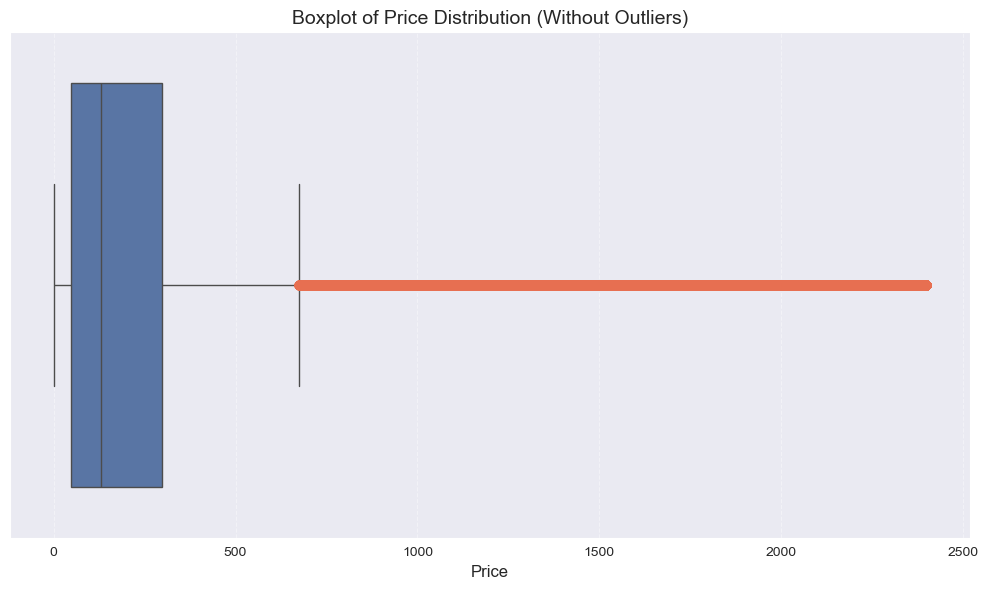

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x=ad_features_cleaned_df['price'],
    color="#4C72B0",
    fliersize=4,
    flierprops=dict(
        marker='o',
        markerfacecolor='#E76F51',
        markeredgecolor='#E76F51',
        markersize=6,
        linestyle='none'
    )
)

plt.title('Boxplot of Price Distribution (Without Outliers)', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()

plt.savefig("graphs/price_boxplot.png", dpi=300, bbox_inches='tight')

plt.show()

In [8]:
ad_features_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807506 entries, 0 to 807505
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   adgroup_id   807506 non-null  int64  
 1   cate_id      807506 non-null  int64  
 2   campaign_id  807506 non-null  int64  
 3   customer     807506 non-null  int64  
 4   brand        565851 non-null  float64
 5   price        807506 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 37.0 MB


In [9]:
missing_values_in_brand = ad_features_cleaned_df['brand'].isnull().sum()
print(f"Missing values in 'brand': {missing_values_in_brand}")

Missing values in 'brand': 241655


In [10]:
ad_features_cleaned_df['brand'] = ad_features_cleaned_df['brand'].astype('Int64')
ad_features_cleaned_df['price'] = ad_features_cleaned_df['price'].astype('int64')
ad_features_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807506 entries, 0 to 807505
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   adgroup_id   807506 non-null  int64
 1   cate_id      807506 non-null  int64
 2   campaign_id  807506 non-null  int64
 3   customer     807506 non-null  int64
 4   brand        565851 non-null  Int64
 5   price        807506 non-null  int64
dtypes: Int64(1), int64(5)
memory usage: 37.7 MB


In [11]:
import faiss
import numpy as np
import pandas as pd

features = ['adgroup_id', 'cate_id', 'campaign_id', 'customer', 'price']

for col in features:
    ad_features_cleaned_df[col] = pd.to_numeric(ad_features_cleaned_df[col], downcast='unsigned')

missing_brand_df = ad_features_cleaned_df[ad_features_cleaned_df['brand'].isnull()]
non_missing_brand_df = ad_features_cleaned_df[ad_features_cleaned_df['brand'].notnull()]

X = non_missing_brand_df[features].values
y = non_missing_brand_df['brand'].values
X_missing = missing_brand_df[features].values

X = X.astype(np.float32)
X_missing = X_missing.astype(np.float32)

index = faiss.IndexFlatL2(X.shape[1])
index.add(X)

batch_size = 10000
num_batches = len(X_missing) // batch_size + (1 if len(X_missing) % batch_size != 0 else 0)

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(X_missing))

    X_missing_batch = X_missing[start_idx:end_idx]

    distances, indices = index.search(X_missing_batch, 1)

    predicted_brands = y[indices.flatten()]

    ad_features_cleaned_df.loc[missing_brand_df.index[start_idx:end_idx], 'brand'] = predicted_brands

    print(f"Processed batch {i + 1}/{num_batches}")

print("Missing brand values filled using FAISS with Euclidean similarity.")

Processed batch 1/25
Processed batch 2/25
Processed batch 3/25
Processed batch 4/25
Processed batch 5/25
Processed batch 6/25
Processed batch 7/25
Processed batch 8/25
Processed batch 9/25
Processed batch 10/25
Processed batch 11/25
Processed batch 12/25
Processed batch 13/25
Processed batch 14/25
Processed batch 15/25
Processed batch 16/25
Processed batch 17/25
Processed batch 18/25
Processed batch 19/25
Processed batch 20/25
Processed batch 21/25
Processed batch 22/25
Processed batch 23/25
Processed batch 24/25
Processed batch 25/25
Missing brand values filled using FAISS with Euclidean similarity.


In [12]:
ad_features_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807506 entries, 0 to 807505
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   adgroup_id   807506 non-null  uint32
 1   cate_id      807506 non-null  uint16
 2   campaign_id  807506 non-null  uint32
 3   customer     807506 non-null  uint32
 4   brand        807506 non-null  Int64 
 5   price        807506 non-null  uint16
dtypes: Int64(1), uint16(2), uint32(3)
memory usage: 19.3 MB


In [14]:
import os
os.makedirs('preprocessed', exist_ok=True)
ad_features_cleaned_df.to_csv('preprocessed/ad_features_final.csv', index=False)